In [2]:
import xarray as xr
import numpy as np
import proplot as plt
import os

In [3]:
path = '/home/jupyter-haruki/work/processed/'

l_dir = os.listdir(path)

In [3]:
loadset = {}
info = []
for fname in l_dir:
    if 'Output' in fname:
        model, ens, exp, __ = fname.split('_')
        info.append([model, ens, exp])
        loadset[fname] = path+fname

In [4]:
data = {}
for fname in loadset:
    data[fname] = xr.open_dataset(loadset[fname])

<xarray.DataArray 'psl' (time: 1980)>
array([101834.46 , 101474.59 , 101616.72 , ..., 101258.42 , 102013.04 ,
       102257.336], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    lat      float64 29.72
    lon      float64 49.5
Attributes:
    long_name:  Sea Level Pressure
    units:      Pa

In [5]:
lat,lon = 30,50
selvars = {}
for fname in data:
    selvars[fname] = data[fname].sel(lat=40,lon=50,method='nearest')

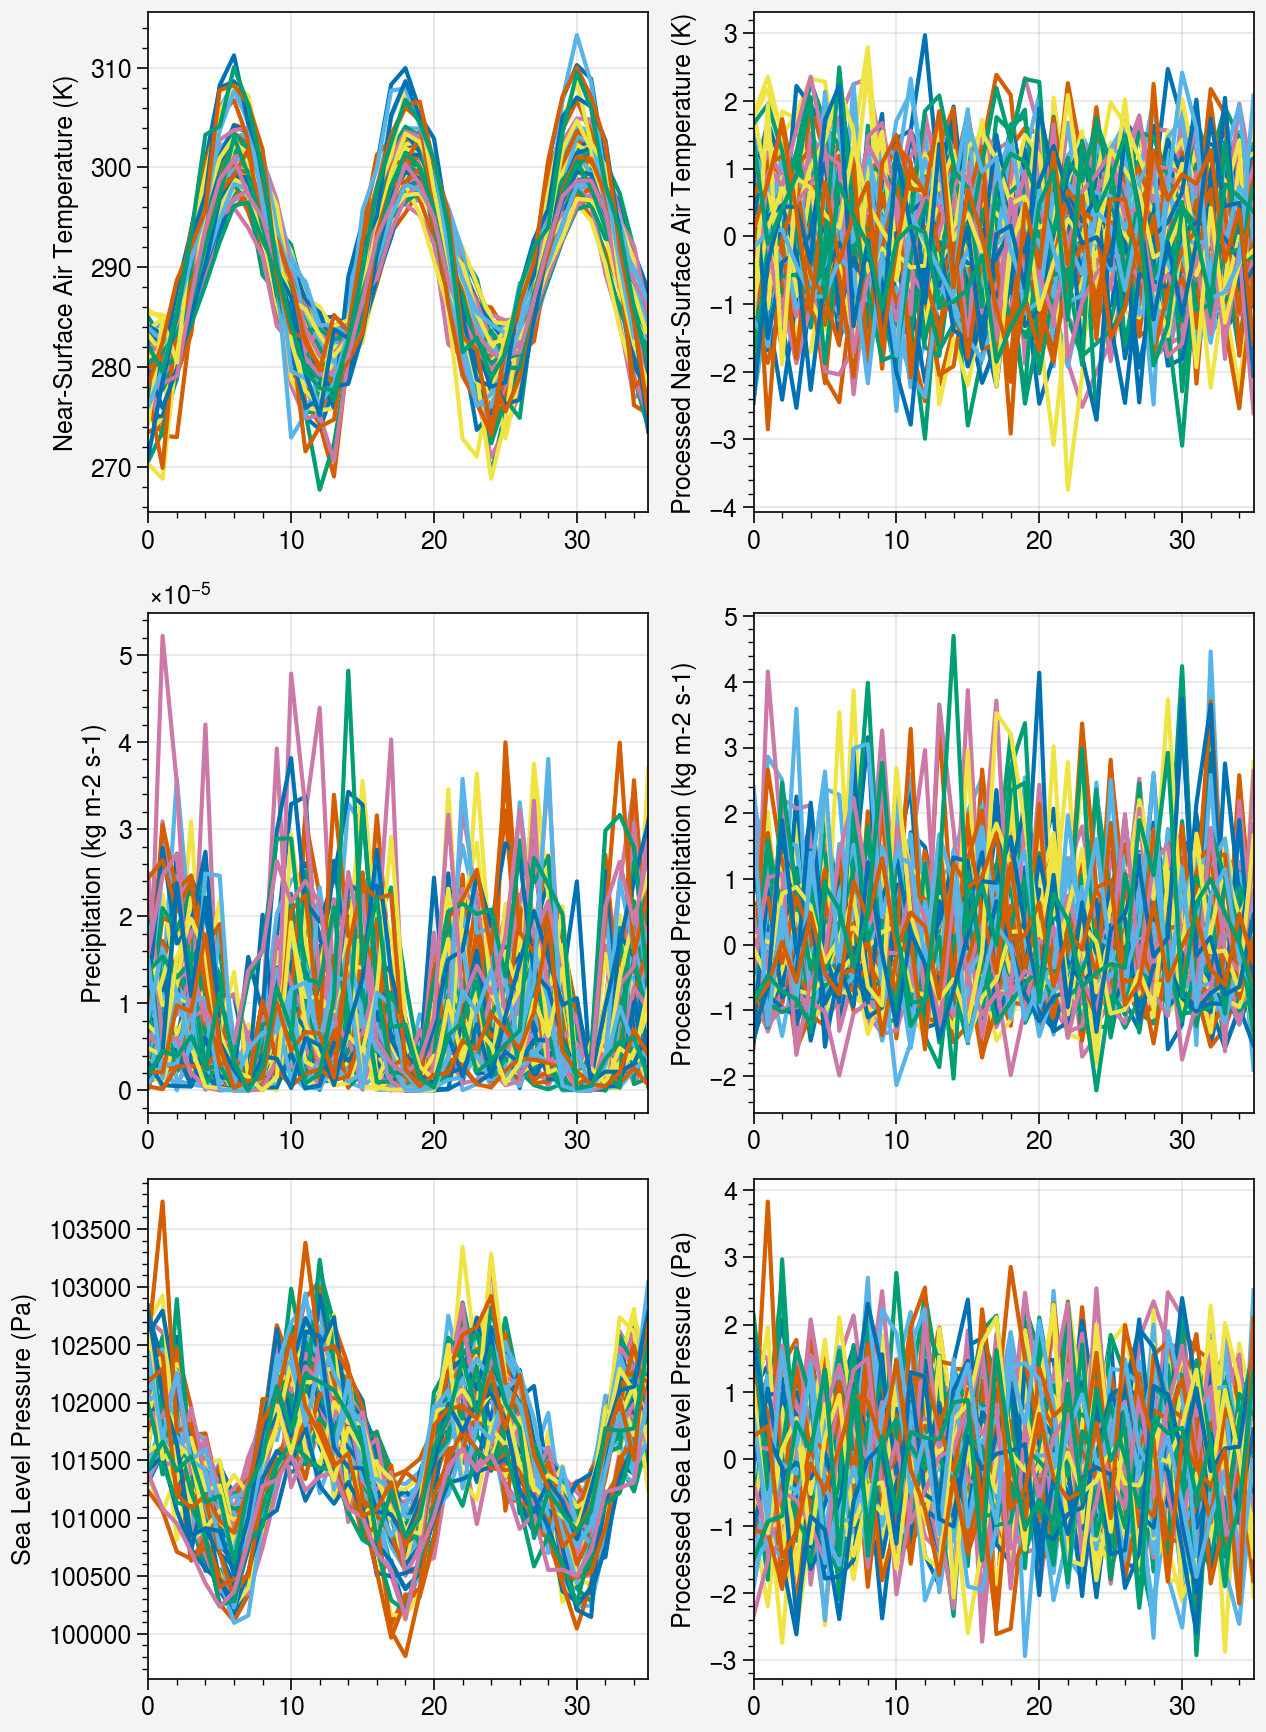

In [6]:
fig,axes = plt.subplots([[1,2],[3,4],[5,6]],share=0)
variables = ['tas','tas_pre','pr','pr_pre','psl','psl_pre']
nt = 36
for i,var in enumerate(variables):
    for fname in selvars:
        try:
            axes[i].plot(np.arange(nt),selvars[fname][var][:nt])
        except:
            print(fname)

In [23]:
models = []
for fname in data:
    model = fname.split('_')[0]
    if not model in models:
        models.append(model)

In [24]:
models

['MIROC6',
 'NorESM2-MM',
 'CESM2-WACCM',
 'CanESM5',
 'BCC-CSM2-MR',
 'CNRM-CM6-1',
 'CNRM-ESM2-1',
 'E3SM-1-0',
 'FGOALS-g3',
 'GFDL-CM4',
 'GFDL-ESM4',
 'MIROC-ES2L',
 'MRI-ESM2-0']

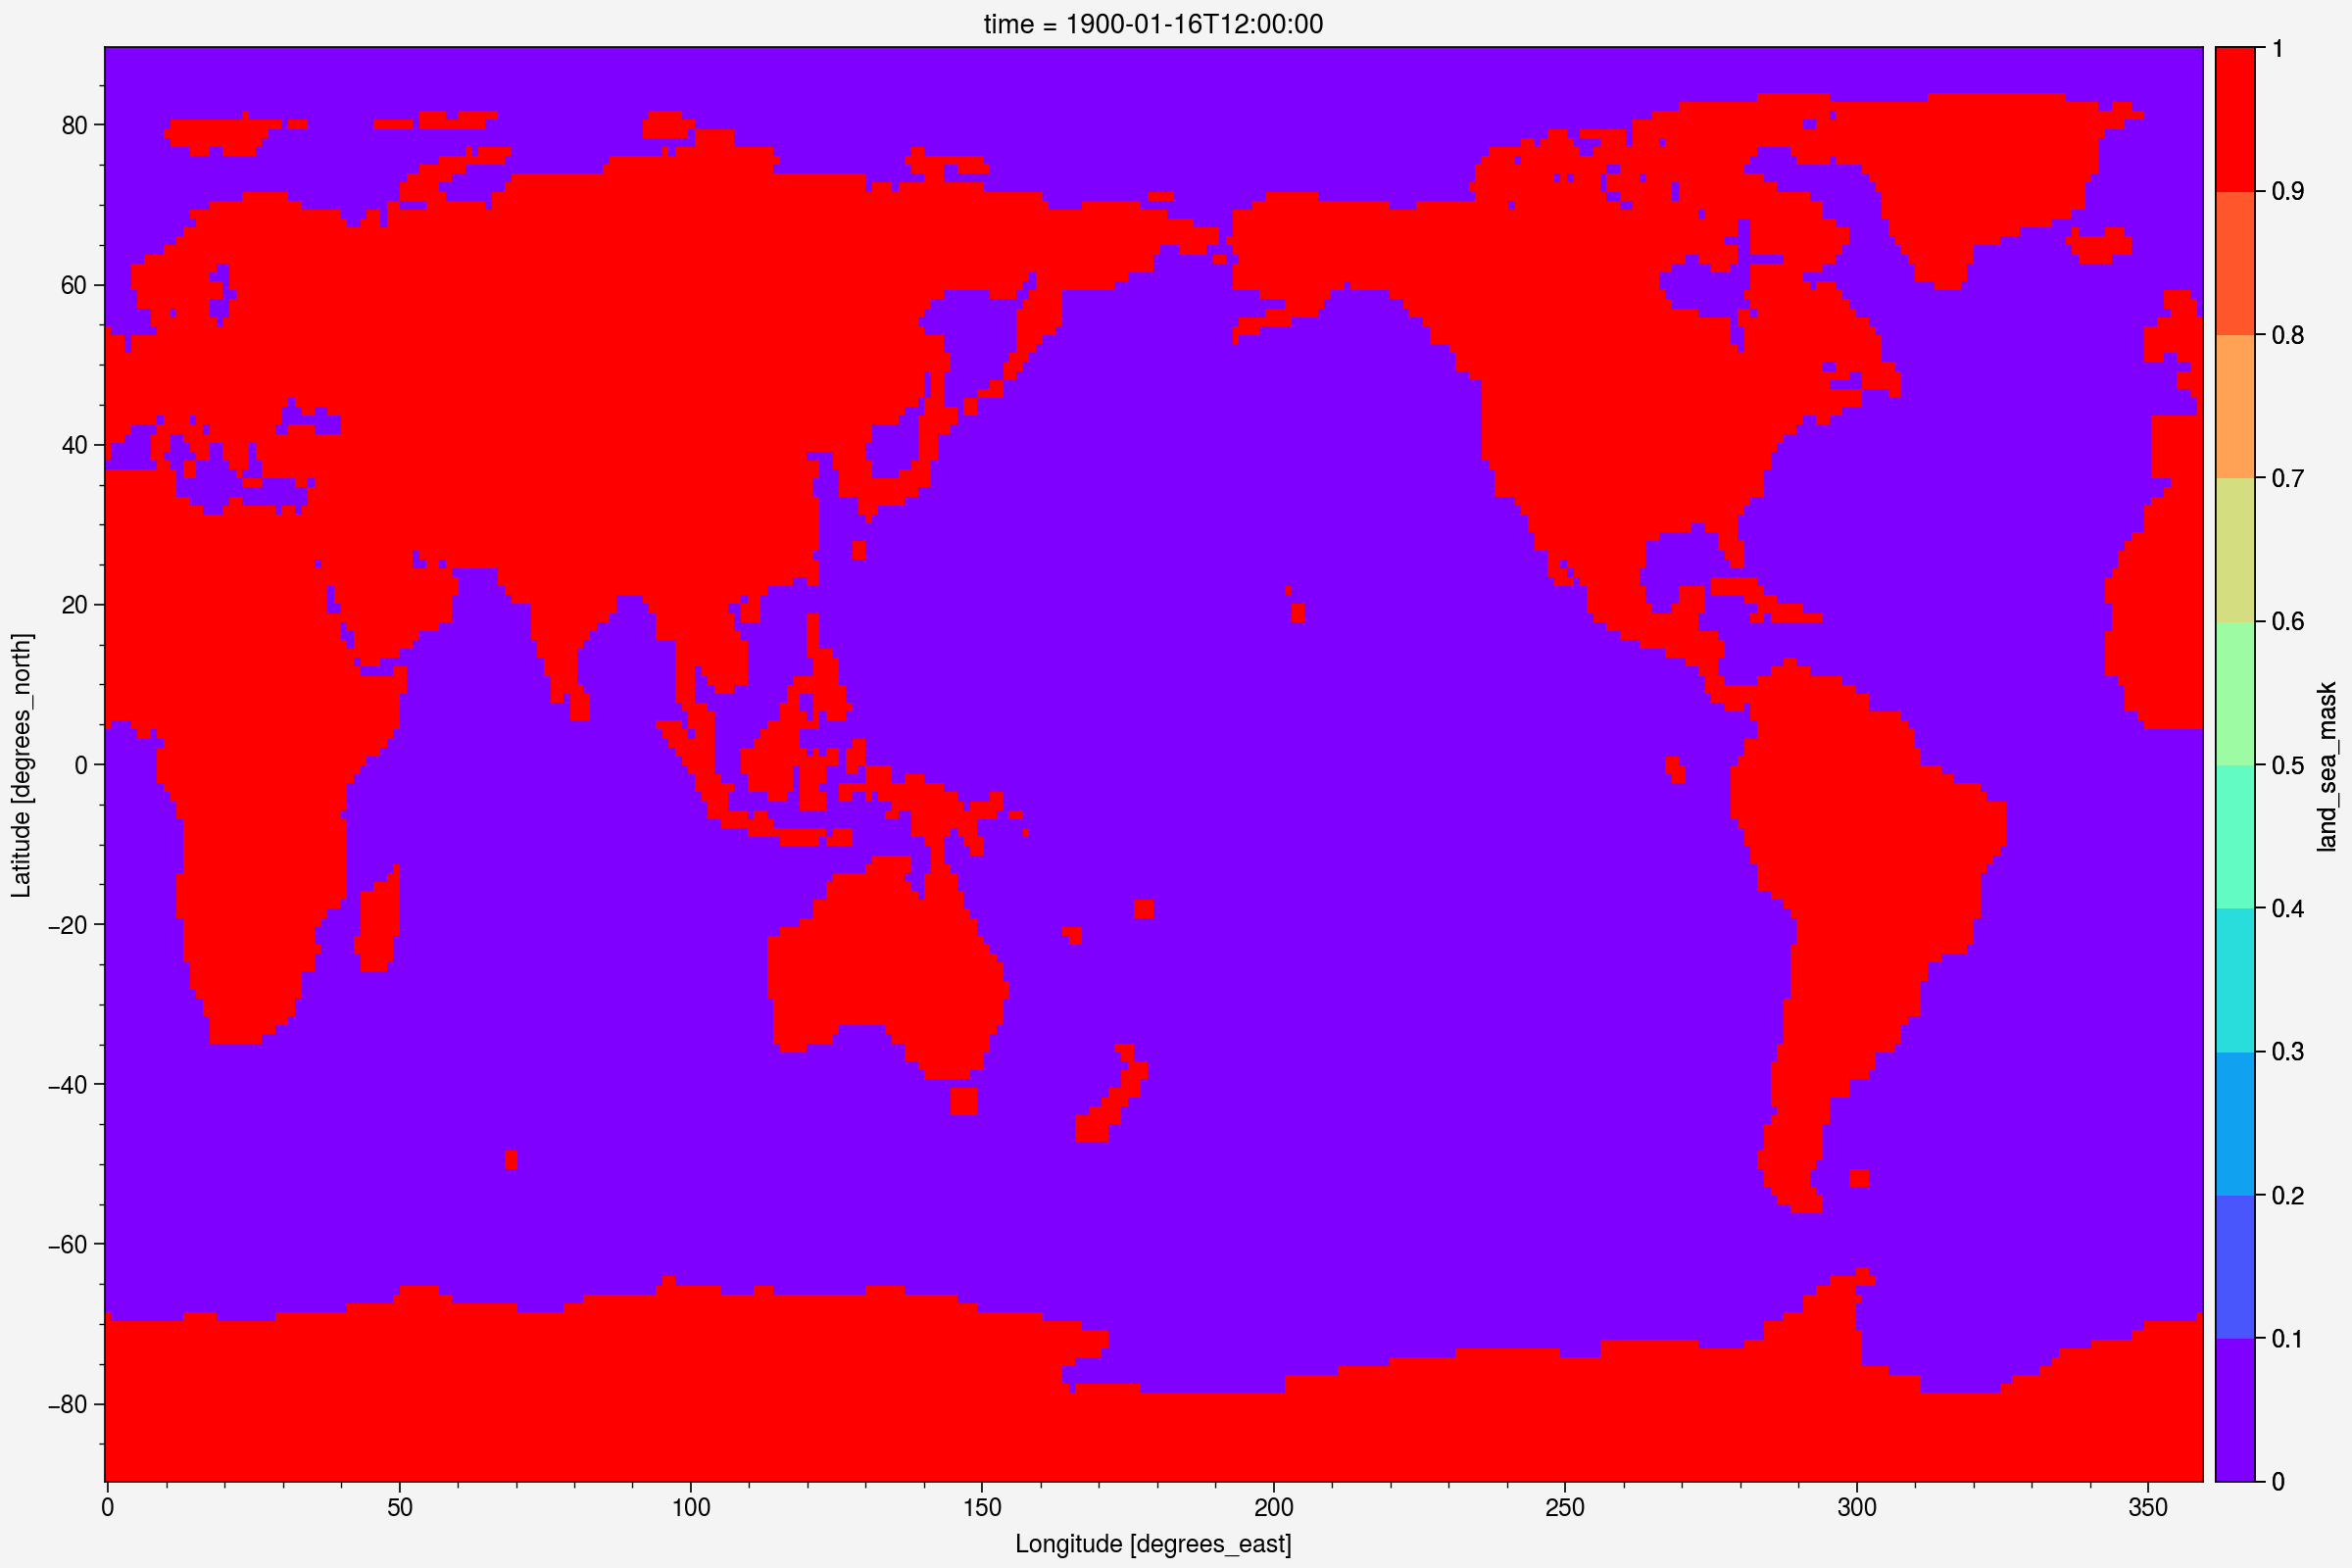

In [36]:
plt.figure(figsize=[12,8])
p = data[fname].lsMask[600].plot(cmap='rainbow')

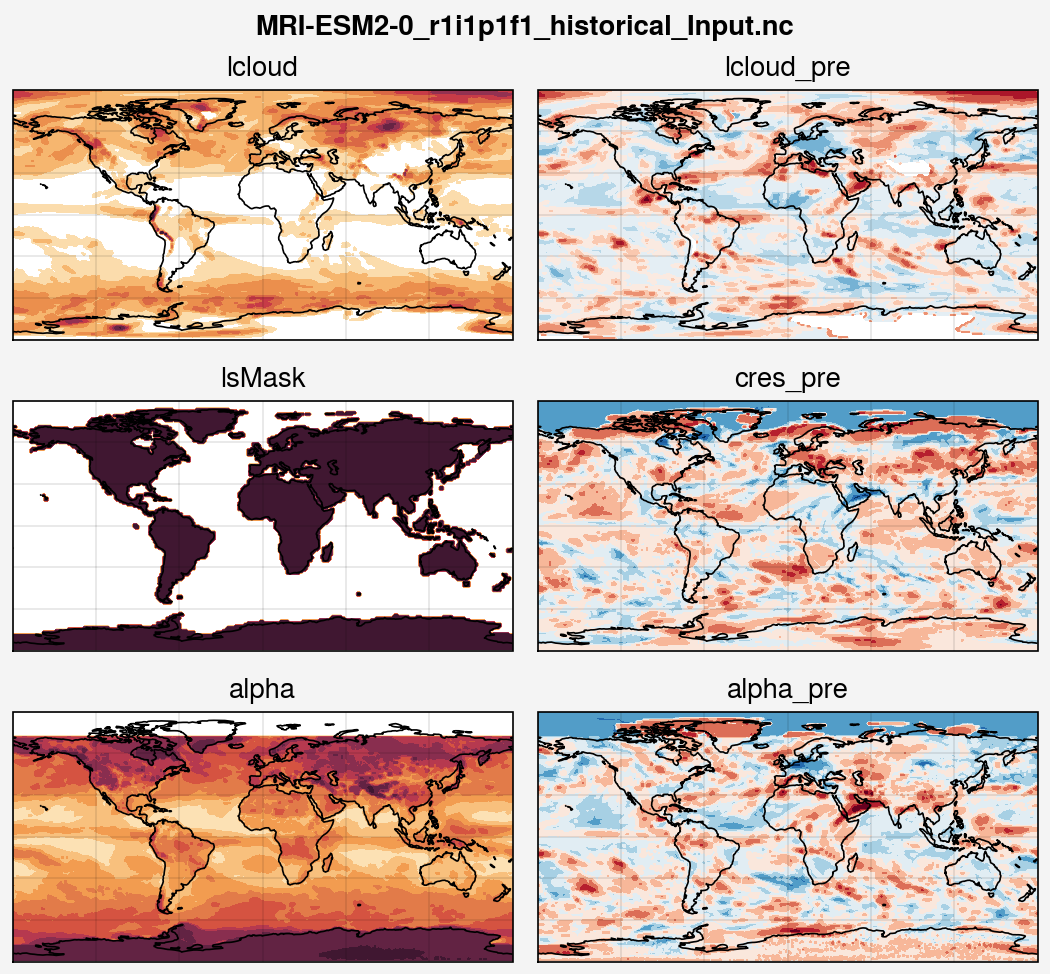

In [35]:
fig,axes = plt.subplots([[1,2],[3,4],[5,6]],share=0,proj='cyl')
variables = ['lcloud','lcloud_pre','lsMask','cres_pre','alpha','alpha_pre']
nt = 36
fname = 'MRI-ESM2-0_r1i1p1f1_historical_Input.nc'
fig.format(coast=True, suptitle = fname)

lat, lon = data[fname]['lat'].values,data[fname]['lon'].values
lons,lats = np.meshgrid(lon,lat)
for i,var in enumerate(variables):
    axes[i].format(title = var)
    axes[i].contourf(lons,lats,data[fname][var][0])


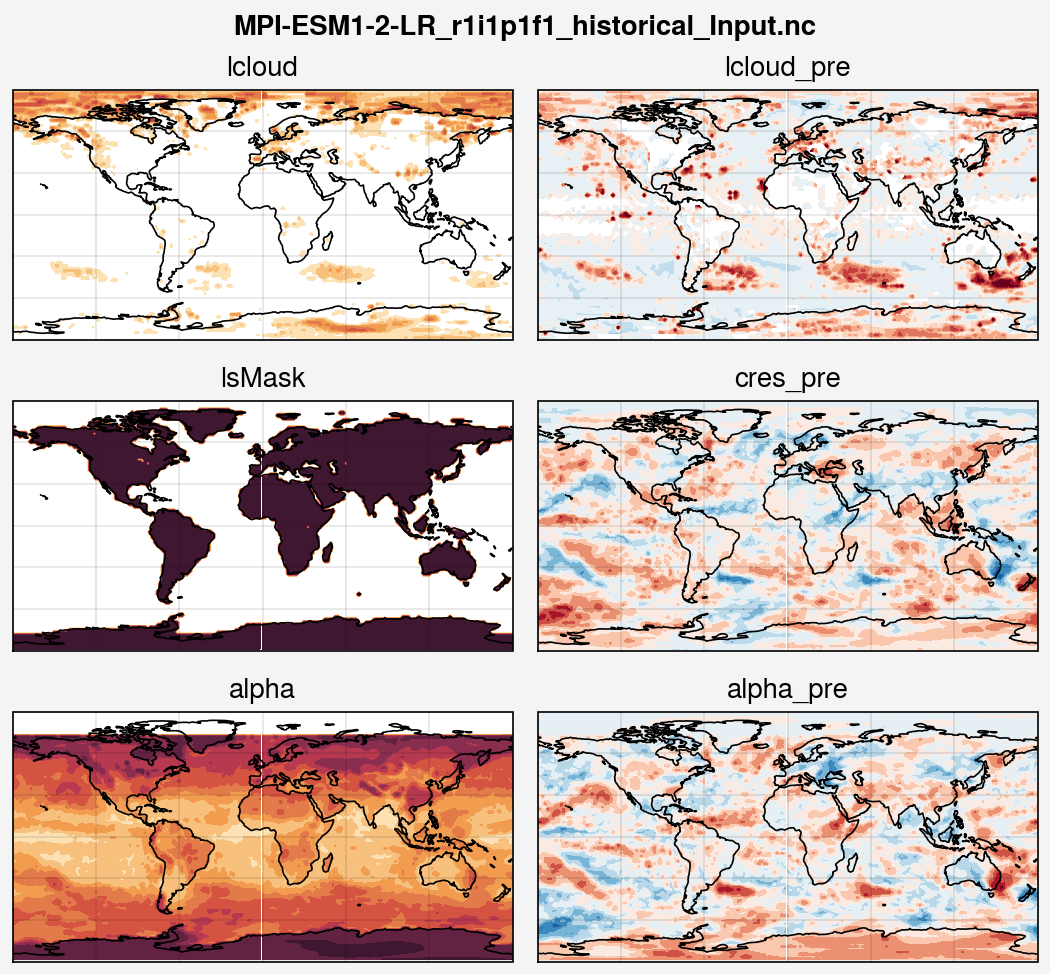

In [5]:

ds = xr.open_dataset('../work/MPI-ESM1-2-LR_r1i1p1f1_historical_Input.nc')
fig,axes = plt.subplots([[1,2],[3,4],[5,6]],share=0,proj='cyl')
variables = ['lcloud','lcloud_pre','lsMask','cres_pre','alpha','alpha_pre']
nt = 36
fig.format(coast=True, suptitle = 'MPI-ESM1-2-LR_r1i1p1f1_historical_Input.nc')

lat, lon = ds['lat'].values,ds['lon'].values
lons,lats = np.meshgrid(lon,lat)
for i,var in enumerate(variables):
    axes[i].format(title = var)
    axes[i].contourf(lons,lats,ds[var][600])


In [ ]:
fig,axes = plt.subplots([[1,2],[3,4],[5,6]],share=0)
variables = ['tas','tas_pre','pr','pr_pre','psl','psl_pre']
nt = 36
for i,var in enumerate(variables):
    for fname in selvars:
        try:
            axes[i].plot(np.arange(nt),selvars[fname][var][:nt])
        except:
            print(fname)

In [19]:
loadset = {}
info = []
for fname in l_dir:
    if 'Input' in fname:
        model, ens, exp, __ = fname.split('_')
        info.append([model, ens, exp])
        loadset[fname] = path+fname
data = {}
for fname in loadset:
    data[fname] = xr.open_dataset(loadset[fname])

In [56]:
lat,lon = 30,50
selvars = {}
for fname in data:
    selvars[fname] = data[fname].sel(lat=-88,lon=50,method='nearest')

In [45]:
data[fname]

<xarray.Dataset>
Dimensions:     (time: 1980, lat: 160, lon: 320)
Coordinates:
  * time        (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:0...
  * lat         (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon         (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Data variables: (12/13)
    cres_pre    (time, lat, lon) float64 ...
    cres        (time, lat, lon) float32 ...
    alpha_pre   (time, lat, lon) float64 ...
    alpha       (time, lat, lon) float32 ...
    clivi_pre   (time, lat, lon) float64 ...
    clivi       (time, lat, lon) float32 ...
    ...          ...
    clwvi       (time, lat, lon) float32 ...
    rlut_pre    (time, lat, lon) float64 ...
    rlut        (time, lat, lon) float32 ...
    lcloud_pre  (time, lat, lon) float64 ...
    lcloud      (time, lat, lon) float64 ...
    lsMask      (time, lat, lon) float32 ...

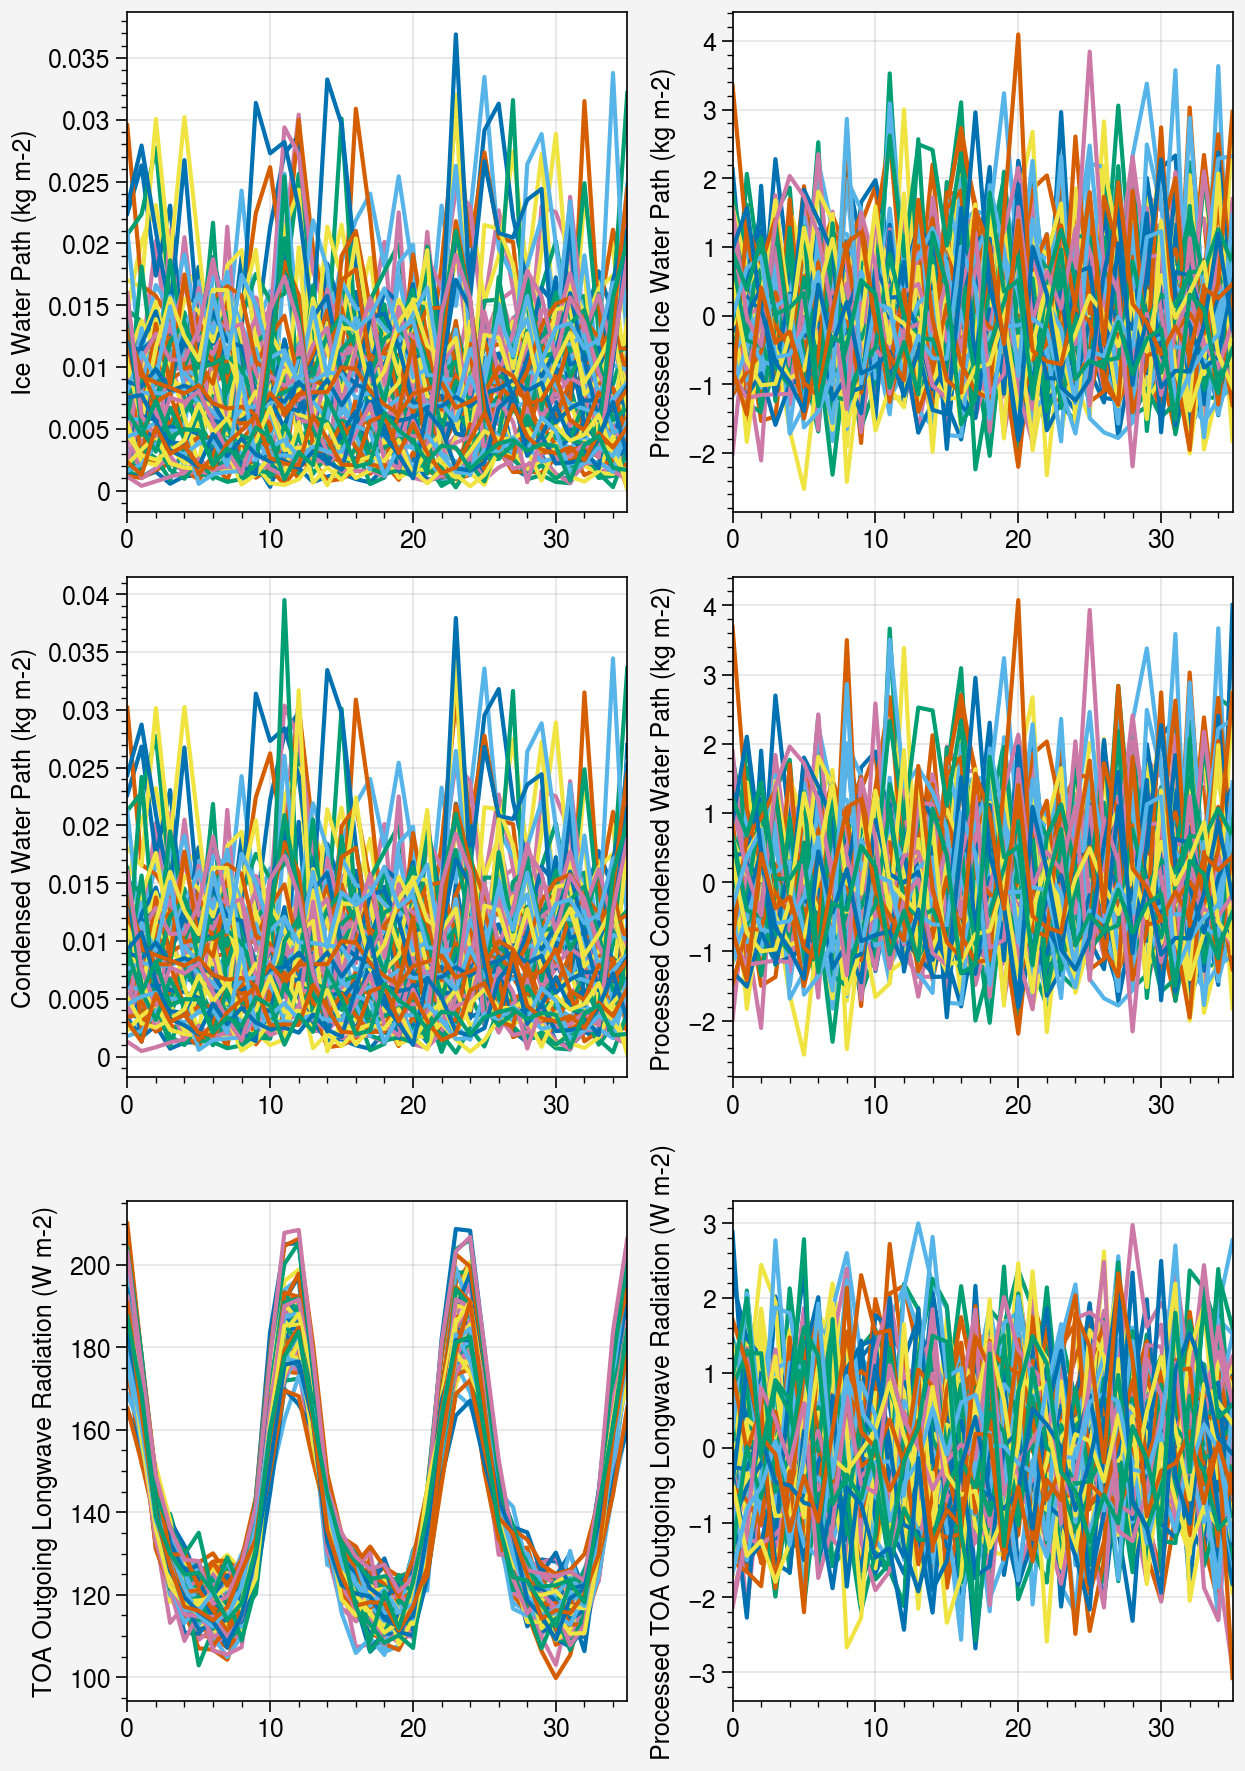

In [57]:
fig,axes = plt.subplots([[1,2],[3,4],[5,6]],share=0)
variables = ['clivi','clivi_pre','clwvi','clwvi_pre','rlut','rlut_pre']
nt = 36
for i,var in enumerate(variables):
    for fname in selvars:
        try:
            axes[i].plot(np.arange(nt),selvars[fname][var][:nt])
        except:
            print(fname)

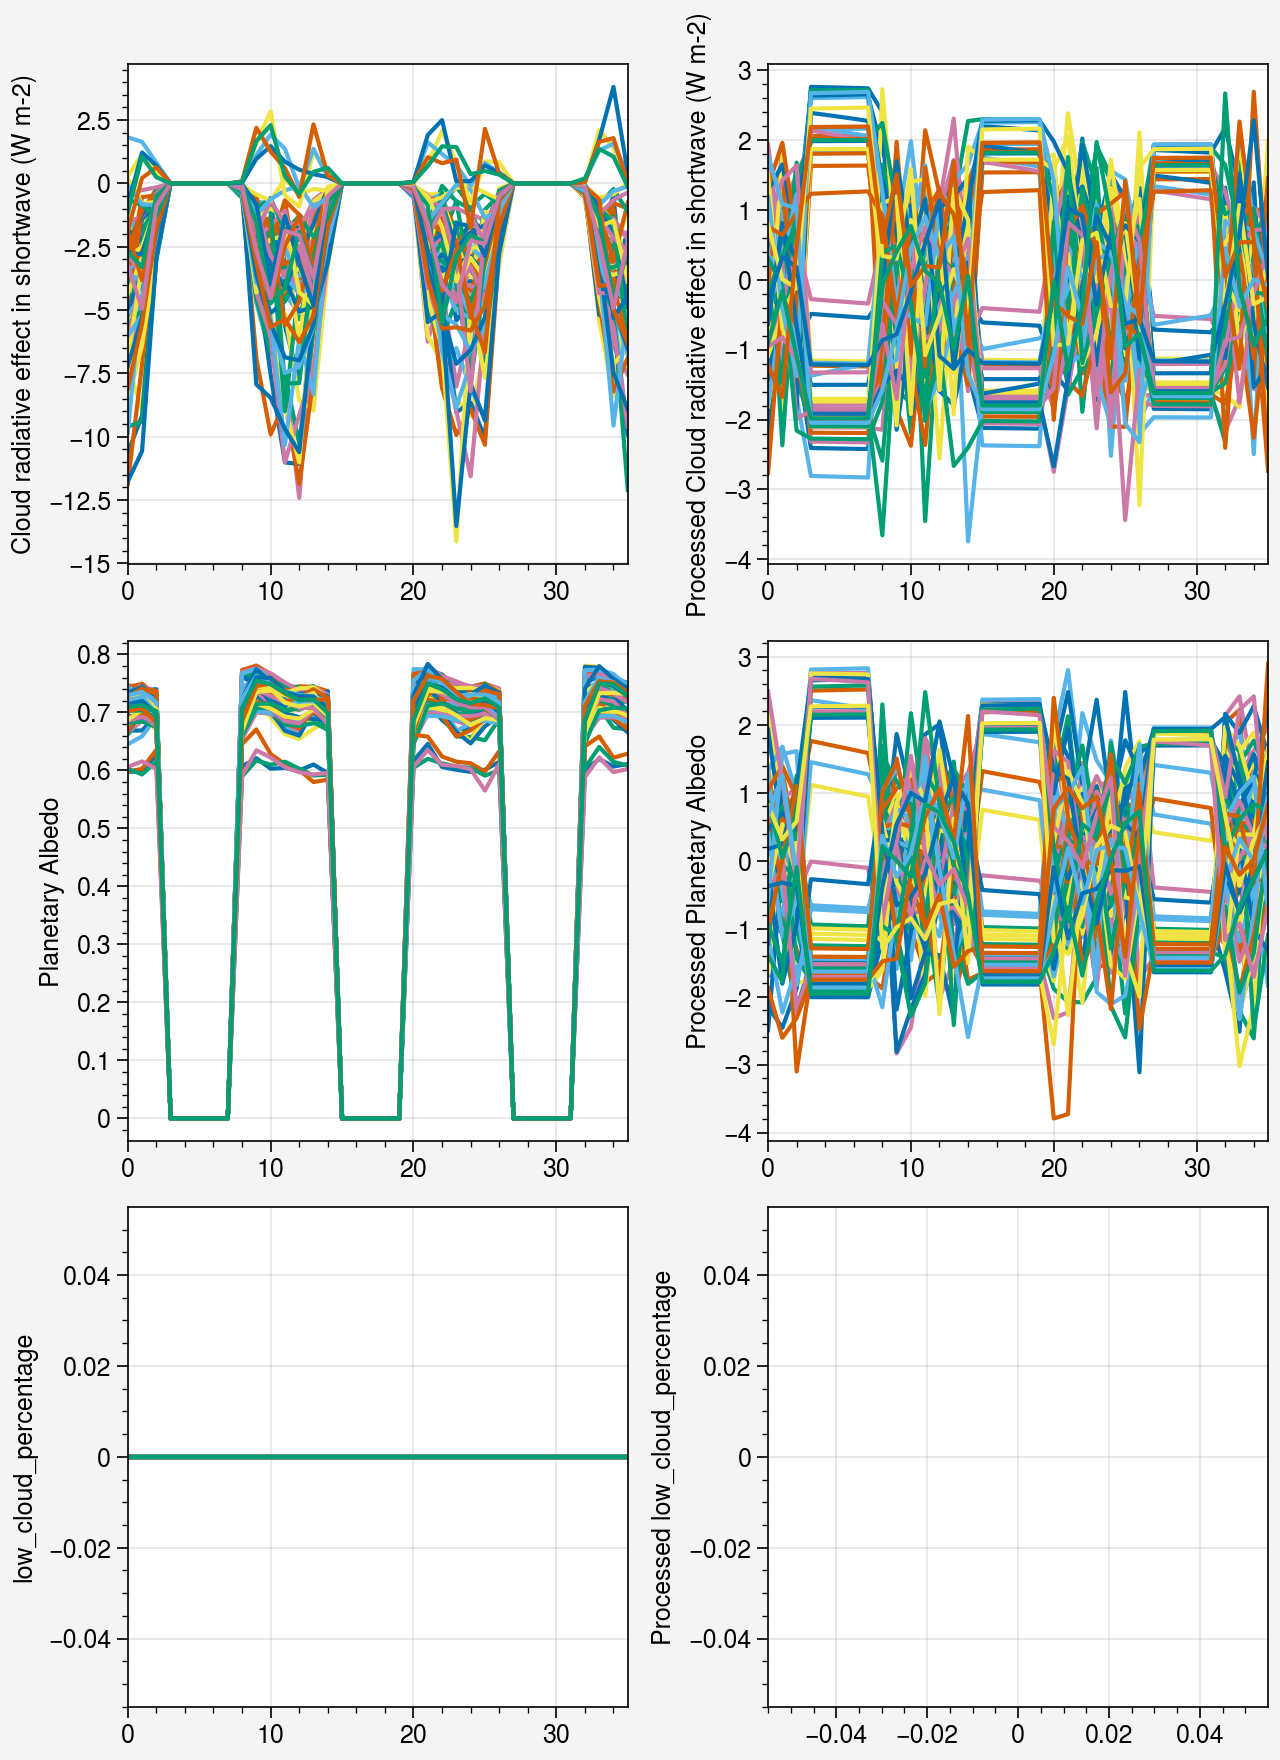

In [58]:
fig,axes = plt.subplots([[1,2],[3,4],[5,6]],share=0)
variables = ['cres','cres_pre','alpha','alpha_pre','lcloud','lcloud_pre']
nt = 36
for i,var in enumerate(variables):
    for fname in selvars:
        try:
            axes[i].plot(np.arange(nt),selvars[fname][var][:nt])
        except:
            print(fname)

In [52]:
for fname in selvars:
    print(fname.split('_')[0],fname.split('_')[2], np.mean(selvars[fname]['cres'][:nt]).values)


MIROC6 historical -39.93785
MIROC6 ssp585 -43.104794
MIROC6 historical -39.84449
MIROC6 ssp585 -41.659798
MIROC6 historical -39.742355
MIROC6 ssp585 -42.52034
MIROC6 historical -39.015705
MIROC6 historical -40.478474
NorESM2-MM historical -27.568907
NorESM2-MM ssp585 -30.873512
CESM2-WACCM historical -21.409098
CESM2-WACCM historical -27.059425
CESM2-WACCM ssp585 -27.922812
CESM2-WACCM historical -25.84333
CESM2-WACCM ssp585 -26.436037
CanESM5 historical -21.989483
CanESM5 ssp585 -20.634386
CanESM5 historical -24.722448
CanESM5 ssp585 -21.673069
CanESM5 historical -21.774357
CanESM5 ssp585 -22.27103
CanESM5 historical -22.852442
CanESM5 ssp585 -22.548767
CanESM5 historical -21.110792
CanESM5 ssp585 -23.293222
BCC-CSM2-MR historical -32.659336
BCC-CSM2-MR ssp585 -35.06055
BCC-CSM2-MR historical -35.73722
BCC-CSM2-MR historical -34.305832
CNRM-CM6-1 historical -21.640808
CNRM-CM6-1 ssp585 -24.606075
CNRM-CM6-1 historical -23.87974
CNRM-CM6-1 ssp585 -23.205984
CNRM-CM6-1 historical -25.58